**Background Information**

**Problem**:
Build a predictive model that accurately estimates the MSRP (Manufacturer's Suggested Retail Price) of automobiles based on various characteristics and features of each car. Predicting MSRP is a common challenge in the automotive industry, as it requires understanding the factors that influence car pricing, including technical specifications, brand, and market trends. The goal is to leverage data-driven insights to estimate MSRP reliably, which can help streamline pricing strategies and offer value in a competitive market.

**Key Stakeholders and Interest**:

1) Automotive Manufacturers: Automakers could use this model to benchmark prices for new models or evaluate the pricing competitiveness of current models. Accurate predictions would enable them to optimize pricing strategies and ensure their offerings align with market expectations.

2) Car Dealerships and Resellers: Dealerships can benefit by setting competitive prices for vehicles, understanding the factors that add value, and identifying price points that attract potential buyers. A predictive model can help dealers price their inventory more effectively, increasing the likelihood of sales.

3) Potential Car Buyers: Buyers may be interested in price prediction tools to understand the fair market value of vehicles, aiding in making informed purchasing decisions. This can help them identify which car features offer the best value for their money.

**Case Outline**

[] Data Exploration: load and examine data to understand struction, variables and pattern. Identify target variable (MSRP) and precitor variables.
[] Data Cleaning and Preparation: remove duplicates, outliers, handle missing values
[] Exploratory Data Analysis (EDA)
[] Modeling: simple regression modeling, feature selection
[] Development and Deployment: final regression model, calculate SSE and predictive accurafcy
[] Conclusion and Recommendation


**Data Preparation**

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load data
data = pd.read_csv('data (1).csv')

# Check the structure and basic statistics of the dataset
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
#Check data size
print(data.shape)

(11914, 16)


In [10]:
# Display first 10 rows of the dataset - make sure the dataset is correctly imported
data.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [12]:
# remove space - clean up column names by removing extra spaces for smoother data handling
data.columns = data.columns.str.strip()
print(data.columns) # Dispaly the column names

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


In [14]:
# Check for duplicates
data = data.drop_duplicates()
print(f"Data shape after removing duplicates: {data.shape}")

Data shape after removing duplicates: (11199, 16)


**Identify & Manage Outliers**

In [17]:
def identify_outliers(df):
    # Get the numerical columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    outliers_info = {}  # Dictionary to hold outliers information

    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Store outliers information
        outliers_info[column] = outliers
        
        print(f"Number of outliers in {column}: {outliers.shape[0]}")
        
    return outliers_info  # Return outliers information

# Identify outliers in the dataset
outliers_info = identify_outliers(data)

# Optionally, print outliers for each column
for col, outliers in outliers_info.items():
    print(f"Outliers in {col}:\n{outliers}\n")

Number of outliers in Year: 467
Number of outliers in Engine HP: 502
Number of outliers in Engine Cylinders: 352
Number of outliers in Number of Doors: 0
Number of outliers in highway MPG: 182
Number of outliers in city mpg: 305
Number of outliers in Popularity: 825
Number of outliers in MSRP: 960
Outliers in Year:
         Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
17       Audi    100  1992  regular unleaded      172.0               6.0   
19       Audi    100  1992  regular unleaded      172.0               6.0   
21       Audi    100  1992  regular unleaded      172.0               6.0   
22       Audi    100  1993  regular unleaded      172.0               6.0   
23       Audi    100  1993  regular unleaded      172.0               6.0   
...       ...    ...   ...               ...        ...               ...   
11374   Acura  Vigor  1992  regular unleaded      176.0               5.0   
11376   Acura  Vigor  1993  regular unleaded      176.0            

In [19]:
def handle_outliers(df):
    # Get the numerical columns
    numeric_cols = df.select_dtypes(include=['number']).columns

    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers from the DataFrame
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df  # Return cleaned data

# Handle outliers in the dataset
data = handle_outliers(data)  # Overwrite 'data' with the cleaned DataFrame

# Print the shape of the data after handling outliers
print(f"Data shape after handling outliers: {data.shape}")

# Identify outliers again after handling to ensure they are removed
new_outliers_info = identify_outliers(data)

# Optionally, print outliers for each column after handling
for col, outliers in new_outliers_info.items():
    print(f"Outliers in {col} after handling:\n{outliers}\n")

Data shape after handling outliers: (8564, 16)
Number of outliers in Year: 225
Number of outliers in Engine HP: 21
Number of outliers in Engine Cylinders: 0
Number of outliers in Number of Doors: 2066
Number of outliers in highway MPG: 0
Number of outliers in city mpg: 0
Number of outliers in Popularity: 210
Number of outliers in MSRP: 106
Outliers in Year after handling:
        Make    Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
27      Audi      100  1994  regular unleaded      172.0               6.0   
28      Audi      100  1994  regular unleaded      172.0               6.0   
29      Audi      100  1994  regular unleaded      172.0               6.0   
30      Audi      100  1994  regular unleaded      172.0               6.0   
31      Audi      100  1994  regular unleaded      172.0               6.0   
...      ...      ...   ...               ...        ...               ...   
11197    GMC  Vandura  1994  regular unleaded      200.0               8.0   
1

In [21]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])  # Show only columns with missing values

Missing values in each column:
Engine Fuel Type       3
Market Category     2817
dtype: int64


In [23]:
# Fill missing values for Engine Fuel Type with the mode
if 'Engine Fuel Type' in data.columns:
    mode_fuel_type = data['Engine Fuel Type'].mode()[0]
    data['Engine Fuel Type'].fillna(mode_fuel_type, inplace=True)

# Fill missing values for Market Category with 'Unknown'
if 'Market Category' in data.columns:
    data['Market Category'].fillna('Unknown', inplace=True)

# Validate handling of missing values
print("Missing values in each column after handling:")
print(data.isnull().sum())

Missing values in each column after handling:
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


C:\Users\angel\AppData\Local\Temp\ipykernel_2784\3369737407.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Engine Fuel Type'].fillna(mode_fuel_type, inplace=True)
C:\Users\angel\AppData\Local\Temp\ipykernel_2784\3369737407.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [25]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**Convert Categorical Data**

In [32]:
# Function to display frequency for a given column 
# Separate the values in Model, Market Category, Make, Engine Fuel Type, and Vehicle Style into the three most frequent values and group the rest as "Other")
def display_frequency(column_name):
    frequency = data[column_name].value_counts().reset_index()
    frequency.columns = [column_name, 'Frequency']
    print(f"\nFrequency of {column_name} values:")
    print(frequency)

# Display frequency of values in specified columns
display_frequency('Model')
display_frequency('Market Category')
display_frequency('Make')
display_frequency('Engine Fuel Type')
display_frequency('Vehicle Style')


Frequency of Model values:
                 Model  Frequency
0       Silverado 1500        156
1               Tundra        129
2          Sierra 1500         90
3             Frontier         76
4               Accord         74
..                 ...        ...
635  S60 Cross Country          1
636          Sierra C3          1
637                 V8          1
638                V90          1
639             Zephyr          1

[640 rows x 2 columns]

Frequency of Market Category values:
                                    Market Category  Frequency
0                                           Unknown       2817
1                                         Crossover        984
2                                            Luxury        677
3                                         Flex Fuel        666
4                                Luxury,Performance        544
5                                       Performance        458
6                                         Hatchback        42

In [34]:
# Function to keep top n categories and label the rest as 'Other'
def categorize_top_n(data, column, n=3):
    top_n = data[column].value_counts().nlargest(n).index
    data[column] = data[column].apply(lambda x: x if x in top_n else 'Other')

# Apply the function to specified columns
categorize_top_n(data, 'Model')
categorize_top_n(data, 'Market Category')
categorize_top_n(data, 'Make')
categorize_top_n(data, 'Engine Fuel Type')
categorize_top_n(data, 'Vehicle Style')

# Display the modified DataFrame
print("\nModified DataFrame with Categorized Columns:")
print(data)


Modified DataFrame with Categorized Columns:
        Make  Model  Year                Engine Fuel Type  Engine HP  \
0      Other  Other  2011     premium unleaded (required)      335.0   
1      Other  Other  2011     premium unleaded (required)      300.0   
2      Other  Other  2011     premium unleaded (required)      300.0   
3      Other  Other  2011     premium unleaded (required)      230.0   
4      Other  Other  2011     premium unleaded (required)      230.0   
...      ...    ...   ...                             ...        ...   
11909  Other  Other  2012     premium unleaded (required)      300.0   
11910  Other  Other  2012     premium unleaded (required)      300.0   
11911  Other  Other  2012     premium unleaded (required)      300.0   
11912  Other  Other  2013  premium unleaded (recommended)      300.0   
11913  Other  Other  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
0       

In [36]:
print(data.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


In [38]:
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Other,Other,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Other,Midsize,Other,23,16,204,46120
11910,Other,Other,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Other,Midsize,Other,23,16,204,56670
11911,Other,Other,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Other,Midsize,Other,23,16,204,50620
11912,Other,Other,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Other,Midsize,Other,23,16,204,50920
11913,Other,Other,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [40]:
# Select only categorical columns
categorical_cols = data.select_dtypes(include='object')

# Get unique counts for each categorical column
unique_counts = categorical_cols.nunique()
print("Unique counts for each categorical column:")
print(unique_counts)

Unique counts for each categorical column:
Make                 4
Model                4
Engine Fuel Type     4
Transmission Type    4
Driven_Wheels        4
Market Category      4
Vehicle Size         3
Vehicle Style        4
dtype: int64


In [42]:
# Model
unique_values = data['Model'].unique()
unique_count = data['Model'].nunique()
print(unique_values)
print("Number of unique Model:", unique_count)

['Other' 'Sierra 1500' 'Silverado 1500' 'Tundra']
Number of unique Model: 4


In [44]:
# Market Category
unique_values = data['Market Category'].unique()
unique_count = data['Market Category'].nunique()
print(unique_values)
print("Number of unique Market Category:", unique_count)

['Other' 'Luxury' 'Unknown' 'Crossover']
Number of unique Market Category: 4


In [46]:
# Check for Missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


In [50]:
# Step 2: Identify all non-numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Step 3: Apply one-hot encoding to all categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Step 4: Convert boolean values (True/False) to numeric (1/0)
data_encoded = data_encoded.astype(int)

# Step 5: Rename the final DataFrame to 'data'
data = data_encoded  # Overwrite 'data' with the encoded DataFrame

# Display the resulting DataFrame
print("\nDataFrame after one-hot encoding and converting True/False to 1/0:")
print(data.head())  # Show the first few rows of the new DataFrame


DataFrame after one-hot encoding and converting True/False to 1/0:
   Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  city mpg  \
0  2011        335                 6                2           26        19   
1  2011        300                 6                2           28        19   
2  2011        300                 6                2           28        20   
3  2011        230                 6                2           28        18   
4  2011        230                 6                2           28        18   

   Popularity   MSRP  Make_Nissan  Make_Other  ...  \
0        3916  46135            0           1  ...   
1        3916  40650            0           1  ...   
2        3916  36350            0           1  ...   
3        3916  29450            0           1  ...   
4        3916  34500            0           1  ...   

   Driven_Wheels_front wheel drive  Driven_Wheels_rear wheel drive  \
0                                0                      

In [52]:
data.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Nissan,Make_Other,...,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Market Category_Luxury,Market Category_Other,Market Category_Unknown,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_Coupe,Vehicle Style_Other,Vehicle Style_Sedan
0,2011,335,6,2,26,19,3916,46135,0,1,...,0,1,0,1,0,0,0,1,0,0
1,2011,300,6,2,28,19,3916,40650,0,1,...,0,1,0,1,0,0,0,0,1,0
2,2011,300,6,2,28,20,3916,36350,0,1,...,0,1,0,1,0,0,0,1,0,0
3,2011,230,6,2,28,18,3916,29450,0,1,...,0,1,0,1,0,0,0,1,0,0
4,2011,230,6,2,28,18,3916,34500,0,1,...,0,1,1,0,0,0,0,0,1,0


In [54]:
# Check for NaN values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Year                                               0
Engine HP                                          0
Engine Cylinders                                   0
Number of Doors                                    0
highway MPG                                        0
city mpg                                           0
Popularity                                         0
MSRP                                               0
Make_Nissan                                        0
Make_Other                                         0
Make_Toyota                                        0
Model_Sierra 1500                                  0
Model_Silverado 1500                               0
Model_Tundra                                       0
Engine Fuel Type_premium unleaded (recommended)    0
Engine Fuel Type_premium unleaded (required)       0
Engine Fuel Type_regular unleaded                  0
Transmission Type_AUTOMATIC                        0
Transmission Ty

In [56]:
# check the shape of the data
print(data.shape)

(8564, 31)


In [76]:
# Sort correlations with MSRP in descending order
correlation_with_target = correlation_matrix['MSRP'].sort_values(ascending=False)
print("Top correlated features with MSRP:")
print(correlation_with_target.head())


Top correlated features with MSRP:
MSRP                                            1.000000
Engine HP                                       0.737822
Year                                            0.597489
Engine Cylinders                                0.383658
Engine Fuel Type_premium unleaded (required)    0.359003
Name: MSRP, dtype: float64


In [83]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Separate features and target
X = data.drop(columns=['MSRP'])
y = data['MSRP']

# --- 1. Filter Method for Continuous Features ---
# Calculate correlations with the target variable
correlations = data.corr()['MSRP'].drop('MSRP').sort_values(ascending=False)

# Select top continuous features based on correlation with target
top_continuous_features = correlations.index[:10]  # top 10 most correlated features

# --- 2. Feature Importance with Embedded Method (Random Forest) ---
# Fit a RandomForest model to get feature importances
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X, y)

# Get feature importances from the model
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
top_features_forest = feature_importances.nlargest(10)  # top 10 most important features

# Pad lists to ensure equal length for DataFrame display
max_length = max(len(top_continuous_features), len(top_features_forest))
top_continuous_features = list(top_continuous_features) + [None] * (max_length - len(top_continuous_features))
top_features_forest = list(top_features_forest.index) + [None] * (max_length - len(top_features_forest.index))

# Create the results DataFrame
results = pd.DataFrame({
    "Top Continuous Features (Correlation)": top_continuous_features,
    "Top Features (Random Forest Importance)": top_features_forest
})

# Display the results
print(results)

             Top Continuous Features (Correlation)  \
0                                        Engine HP   
1                                             Year   
2                                 Engine Cylinders   
3     Engine Fuel Type_premium unleaded (required)   
4                            Market Category_Other   
5                      Transmission Type_AUTOMATIC   
6                               Vehicle Size_Large   
7  Engine Fuel Type_premium unleaded (recommended)   
8                             Vehicle Size_Midsize   
9                                  Number of Doors   

  Top Features (Random Forest Importance)  
0                               Engine HP  
1                                    Year  
2                              Popularity  
3                             highway MPG  
4       Engine Fuel Type_regular unleaded  
5                                city mpg  
6                     Vehicle Style_Other  
7         Driven_Wheels_front wheel drive  
8        

Engine HP and Year are top features in both methods, highlighting their consistent impact on MSRP.
Random Forest adds features like Popularity and Fuel Efficiency (highway and city MPG), capturing factors that relate to consumer preferences and operational costs.

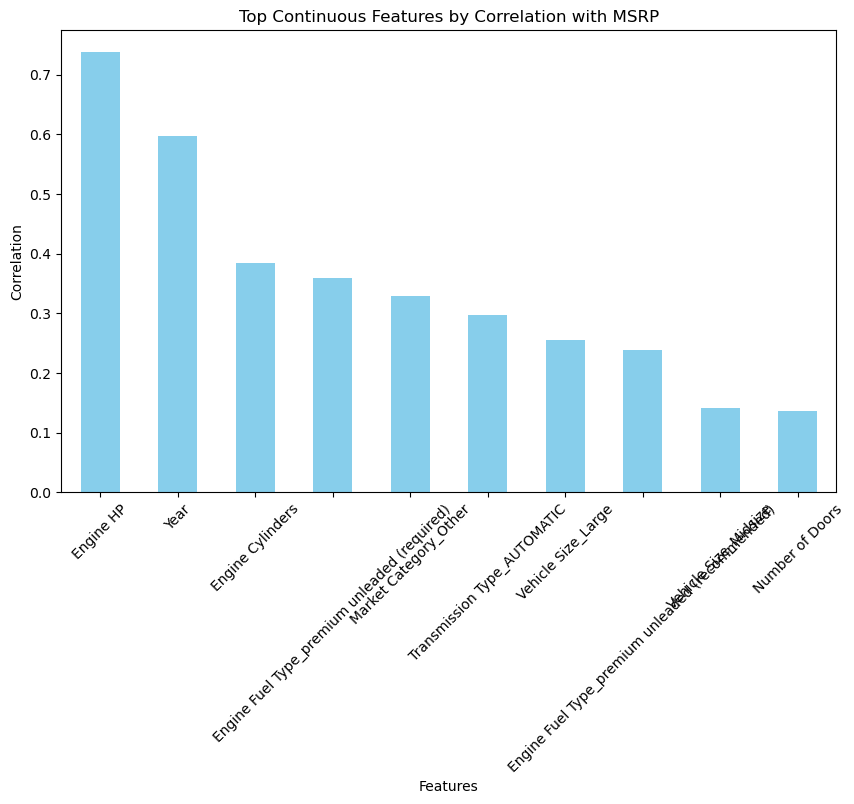

In [86]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 1. Correlation Bar Plot
plt.figure(figsize=(10, 6))
correlations[top_continuous_features].plot(kind='bar', color='skyblue')
plt.title('Top Continuous Features by Correlation with MSRP')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1023.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:55:39   Log-Likelihood:                -87878.
No. Observations:                8564   AIC:                         1.758e+05
Df Residuals:                    8533   BIC:                         1.760e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

C:\Users\angel\AppData\Local\Temp\ipykernel_2784\1328887665.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df.index, y='Coefficient', data=coef_df, palette='viridis')


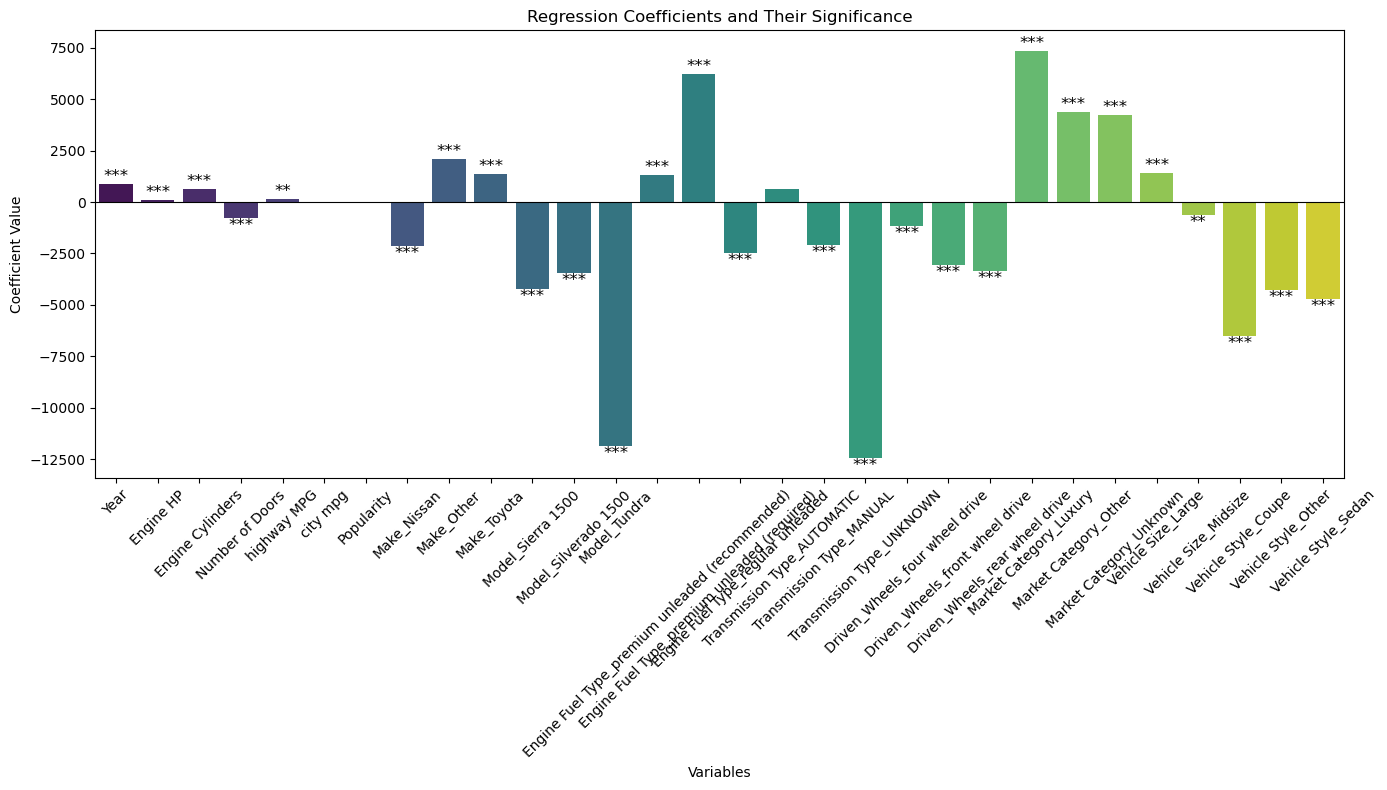

In [94]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target and predictor variables
y = data['MSRP']
X = data.drop('MSRP', axis=1)

# Add a constant to the predictor variables (required for the OLS model in statsmodels)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

# Extract the coefficients and p-values
coef_df = pd.DataFrame({
    'Coefficient': model.params,
    'P-Value': model.pvalues
})

# Determine significance levels for each coefficient
def significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

# Apply significance levels to the coefficients
coef_df['Significance'] = coef_df['P-Value'].apply(significance_stars)

# Filter out the constant term for plotting
coef_df = coef_df.drop('const', errors='ignore')

# Plotting the coefficients with significance
plt.figure(figsize=(14, 8))
sns.barplot(x=coef_df.index, y='Coefficient', data=coef_df, palette='viridis')

# Add significance stars above the bars
for i, (coef, significance) in enumerate(zip(coef_df['Coefficient'], coef_df['Significance'])):
    if significance:  # Only add stars if there is significance
        plt.text(i, coef, significance, ha='center', va='bottom' if coef > 0 else 'top', fontsize=12)

# Formatting the plot
plt.title('Regression Coefficients and Their Significance')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


Engine HP, Year, and Popularity are consistently strong, positive indicators of vehicle price.
Certain specific makes and models (e.g., Tundra, Silverado 1500, Sierra 1500) may hurt pricing.
Vehicle type, drivetrain, and engine specifications contribute greatly to a vehicle’s price.

**Training and Testing Data Split**

Split the data into an 70-30 training and testing set to maintain a portion of the data for evaluating model performance.

In [97]:
# Import essential libraries
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop(columns=['MSRP'])
y = data['MSRP']

# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Visualizations**

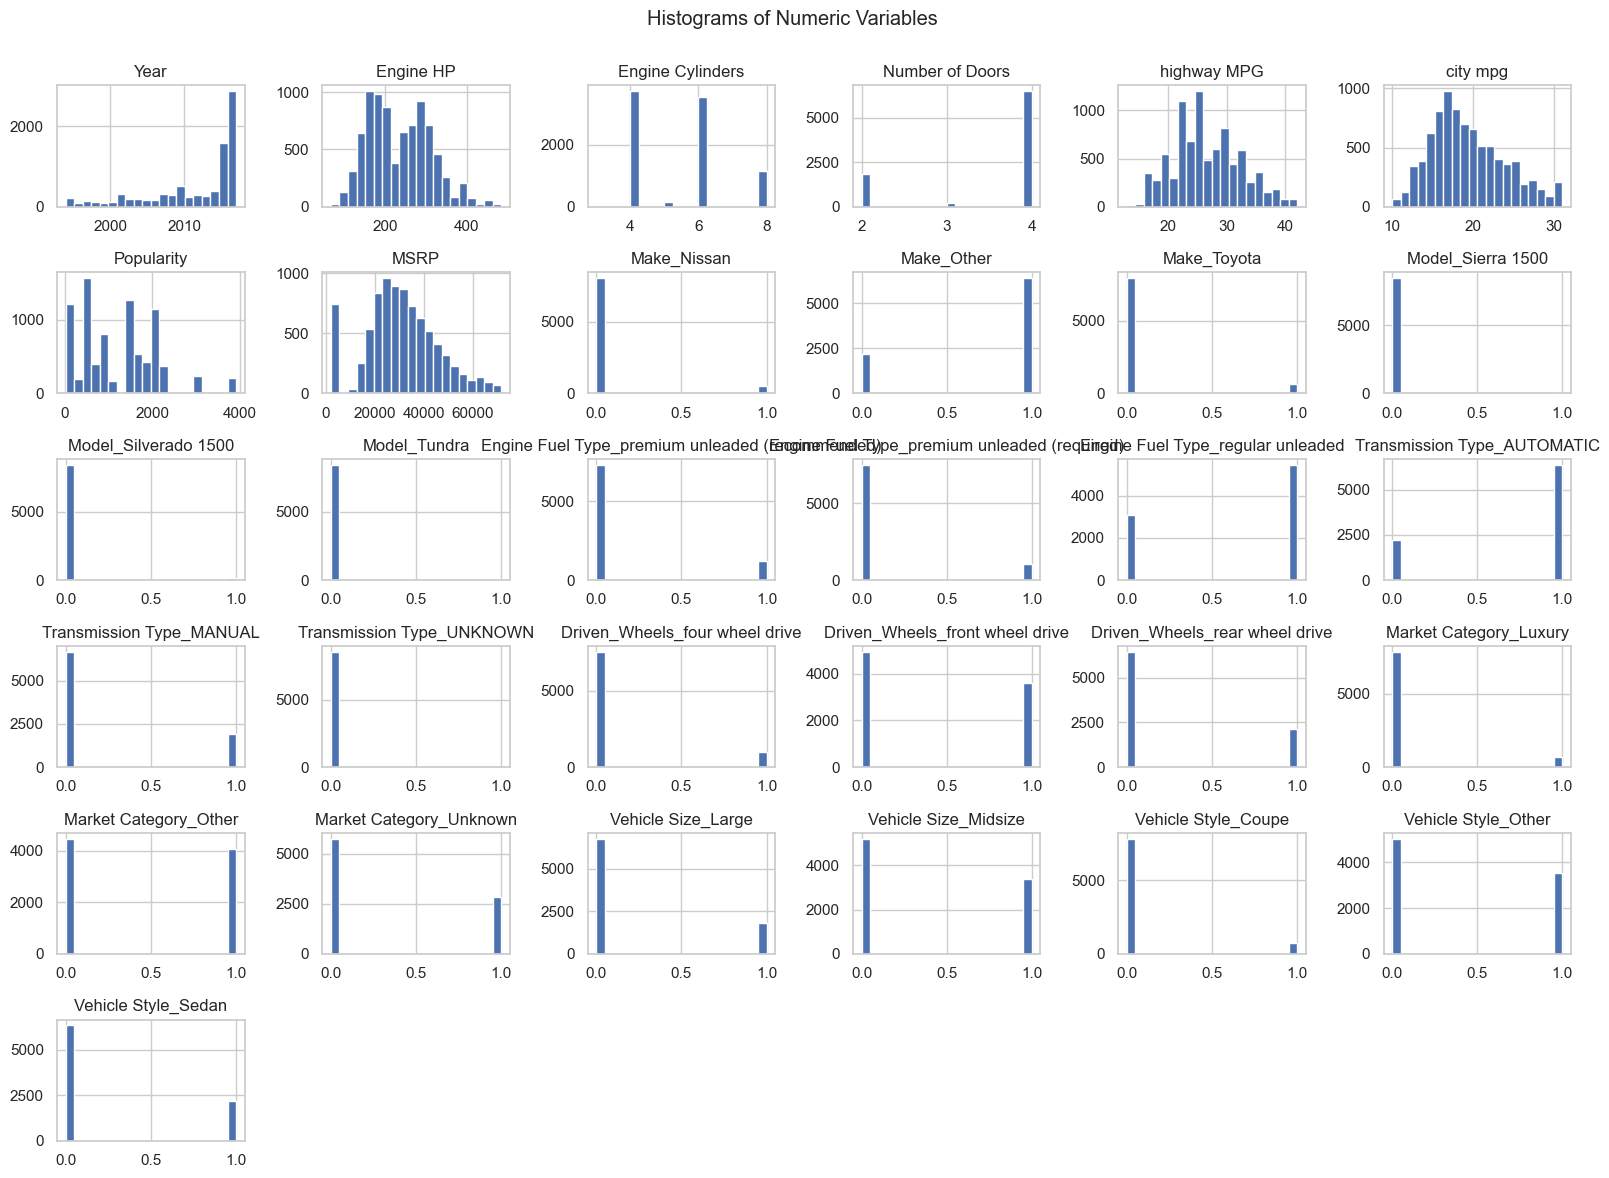

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Generate histograms for each numeric column
data.hist(figsize=(16, 12), bins=20)
plt.suptitle('Histograms of Numeric Variables')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

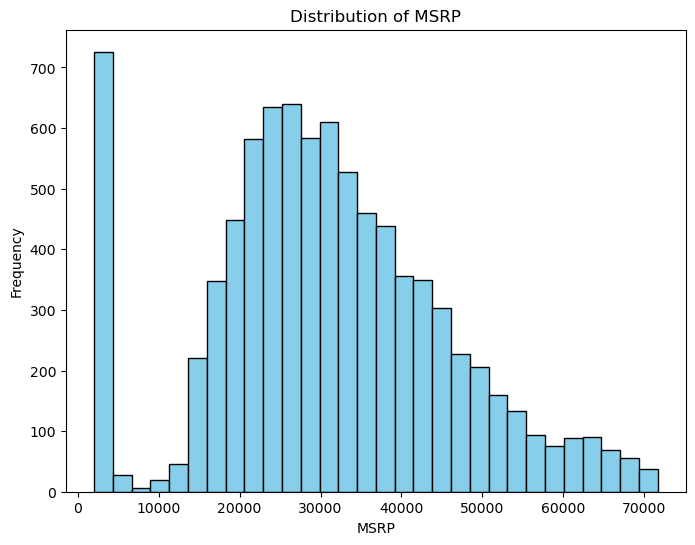

In [61]:
import matplotlib.pyplot as plt

# Histogram of the target variable
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of MSRP")
plt.xlabel("MSRP")
plt.ylabel("Frequency")
plt.show()


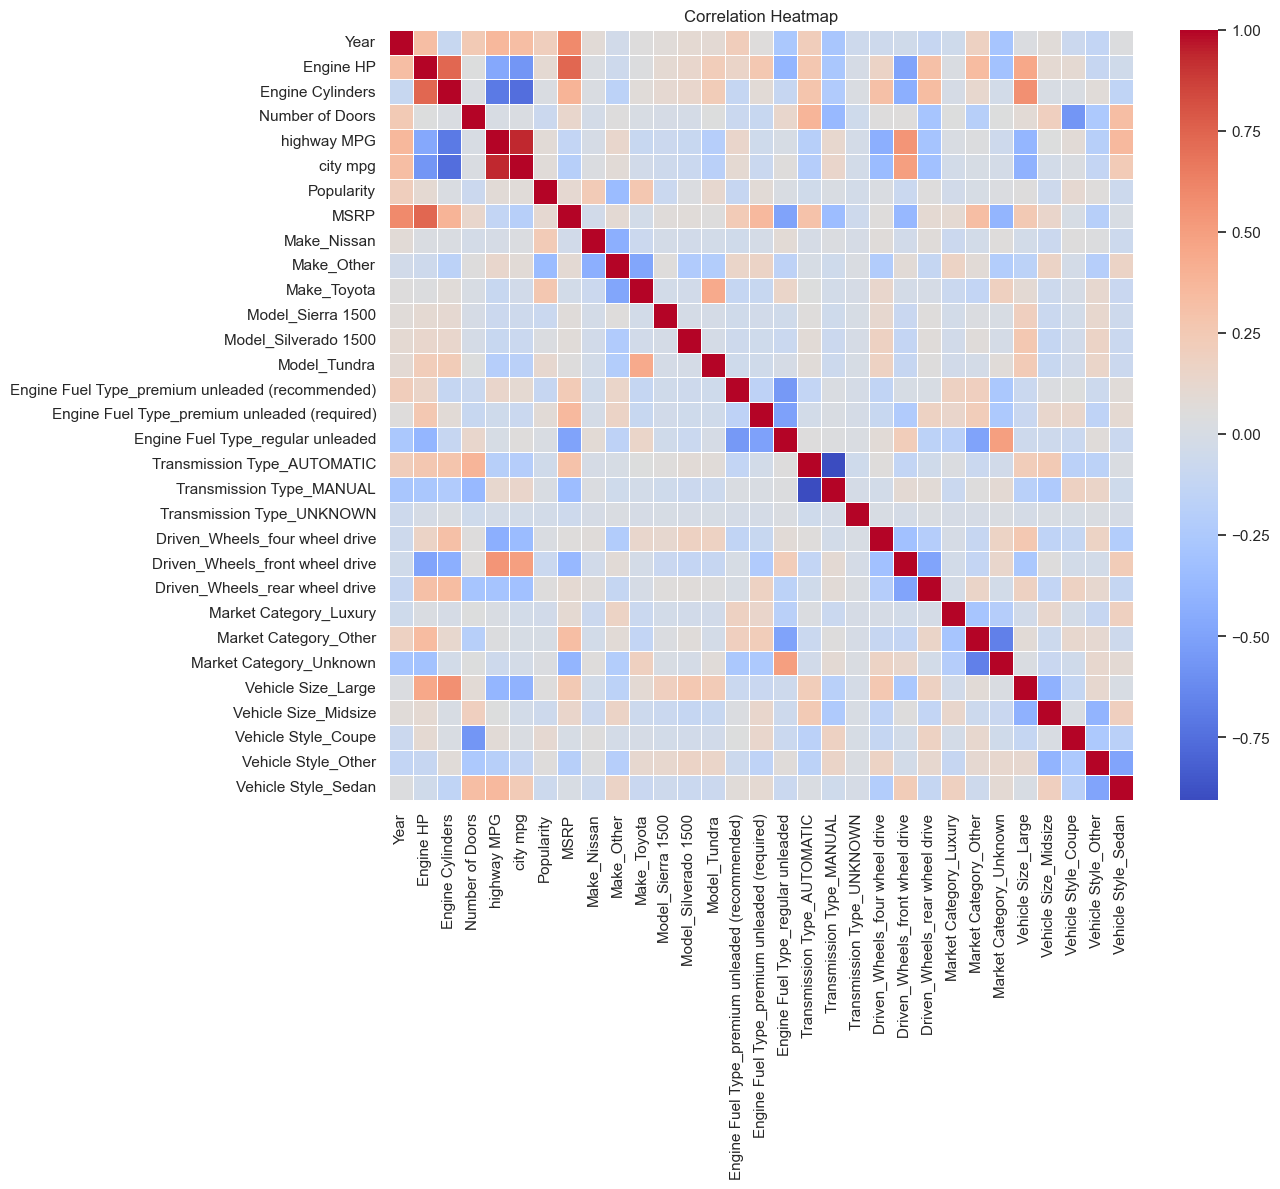

In [109]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**Box Plot for Top 20 Features and MSRP**

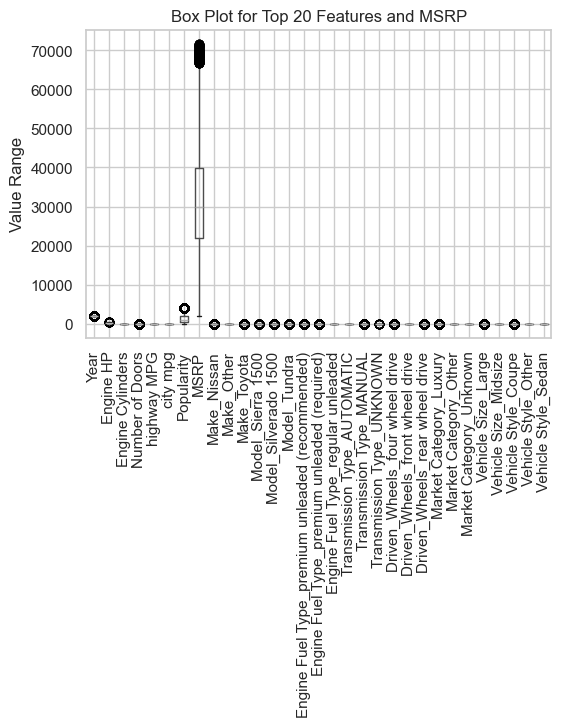

In [111]:
data.boxplot(figsize=(6, 4))
plt.title("Box Plot for Top 20 Features and MSRP")
plt.xticks(rotation=90)
plt.ylabel("Value Range")
plt.show()

To explore the distribution and range of values for each feature, we use a box plot. This visualization shows the spread of data across the top 20 features along with MSRP. The box plot helps us identify potential outliers, medians, and interquartile ranges for each variable, providing insights into data variability.

Each box represents the interquartile range (IQR), with the line inside indicating the median value. The "whiskers" extend to show the range of data within 1.5 times the IQR, and any points outside this range are considered outliers.
This plot offers a clear summary of each variable’s distribution, helping us understand the relative scales and ranges of values across features and MSRP.


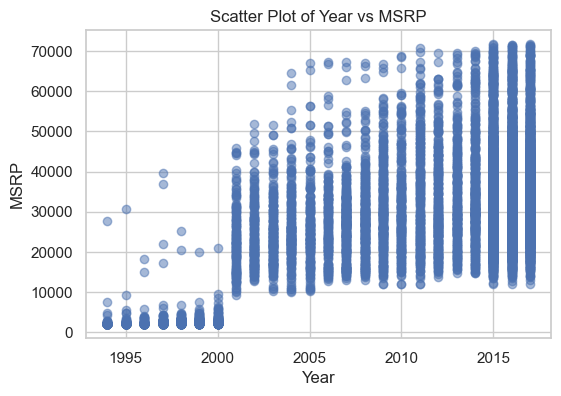

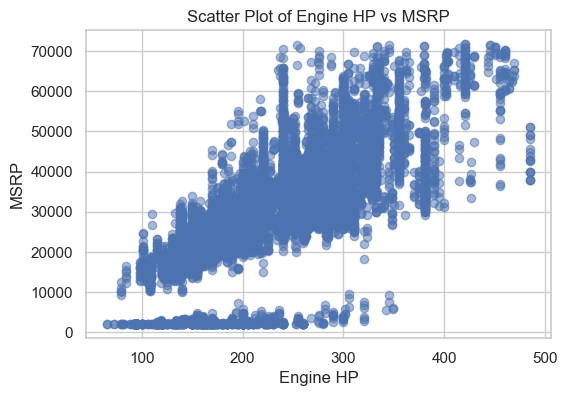

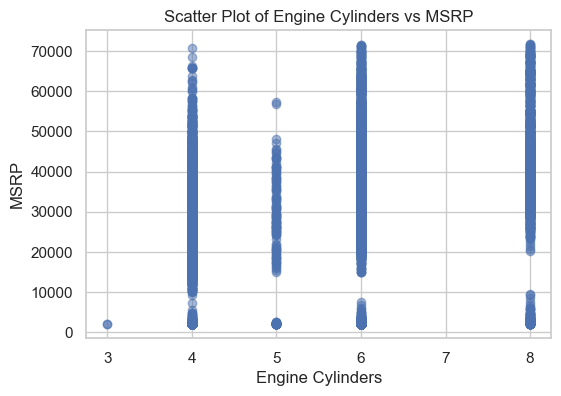

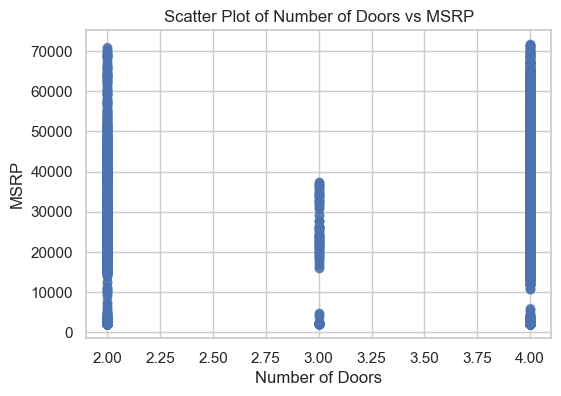

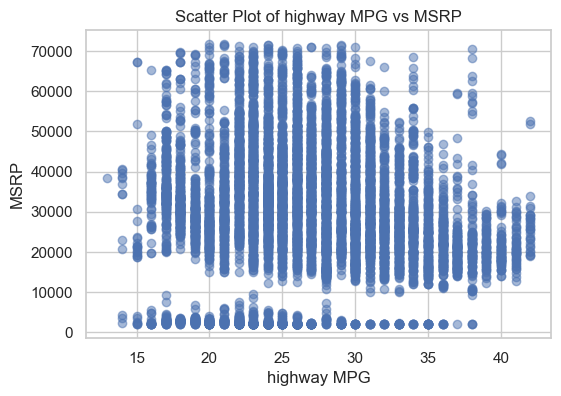

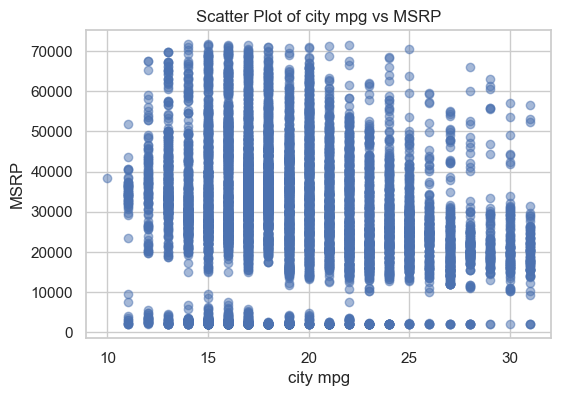

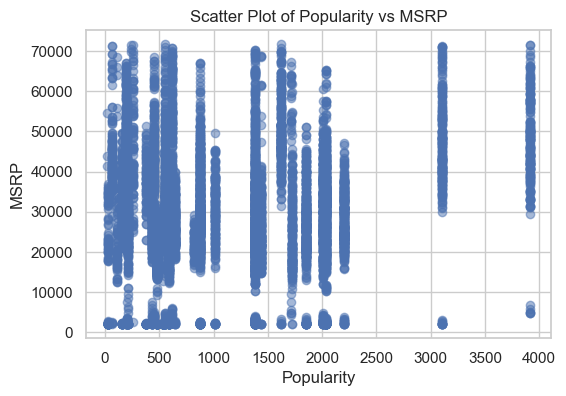

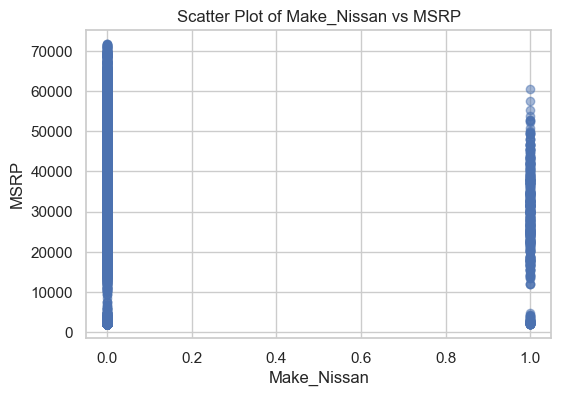

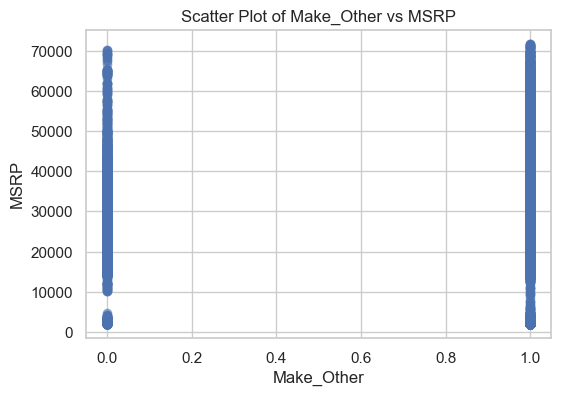

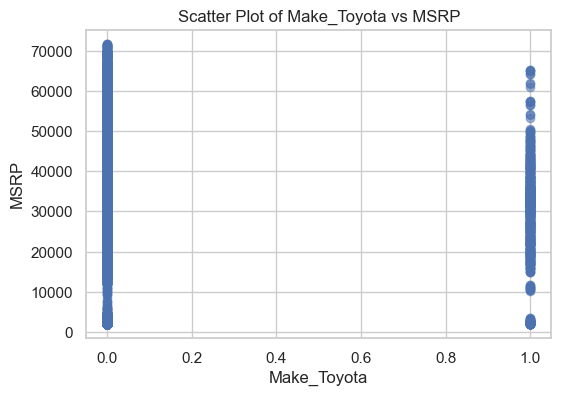

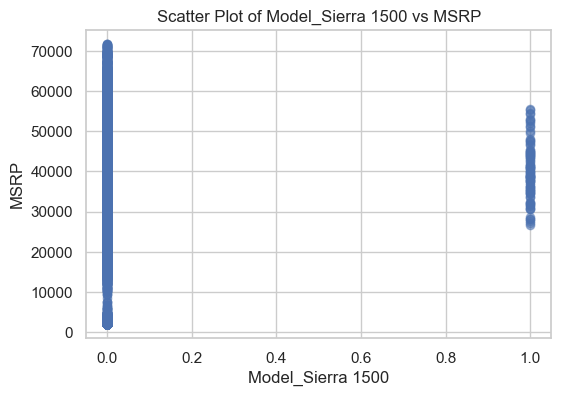

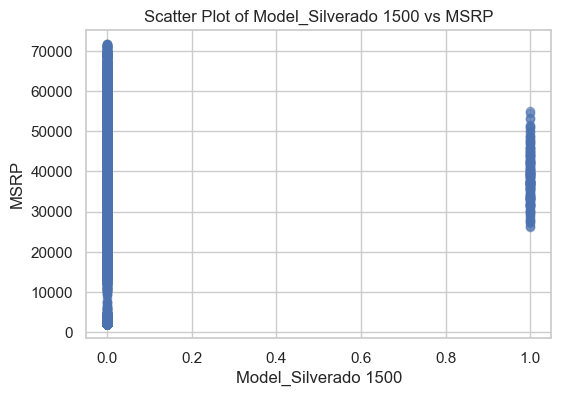

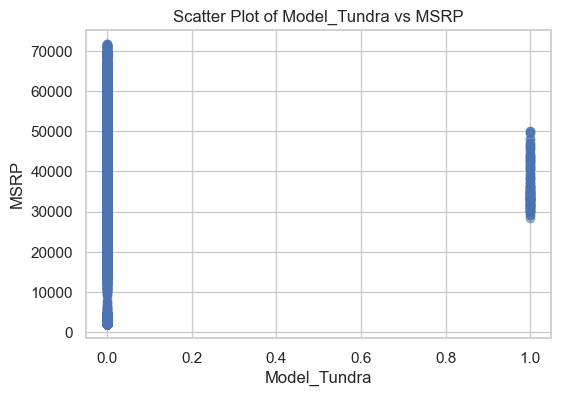

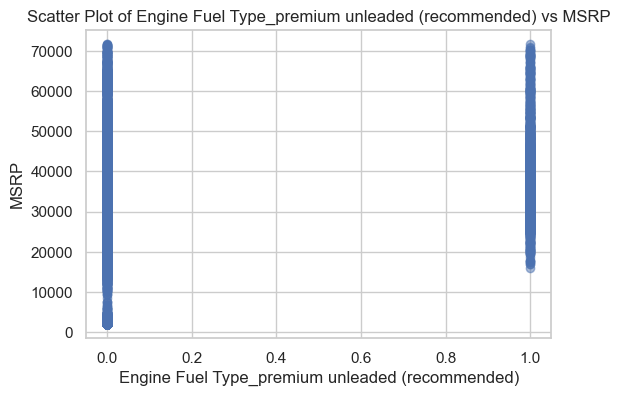

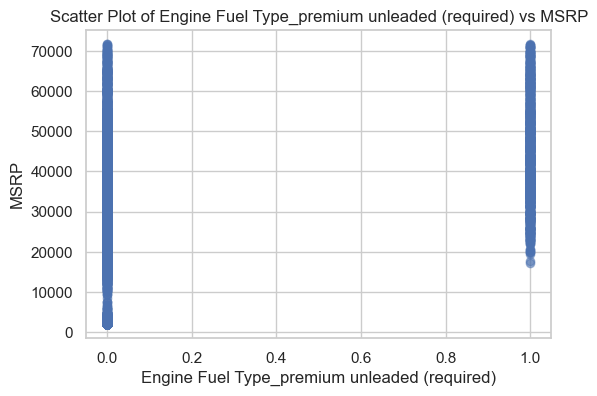

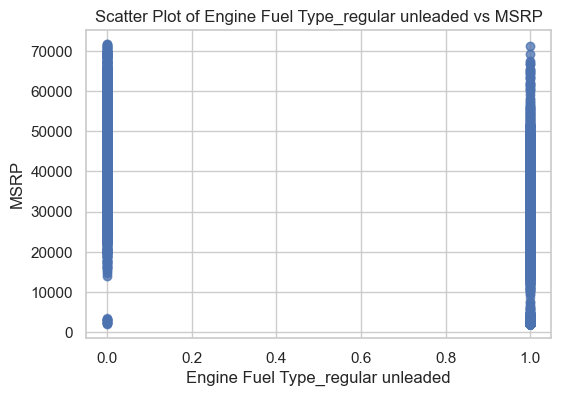

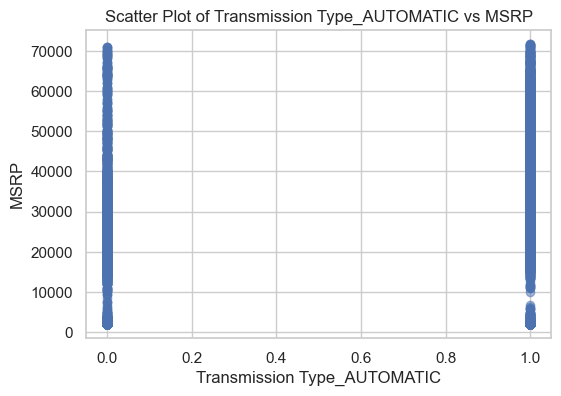

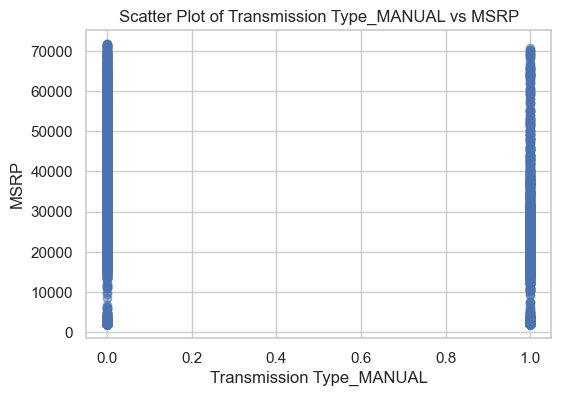

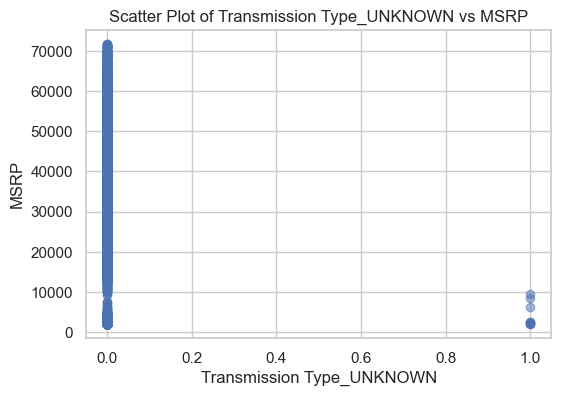

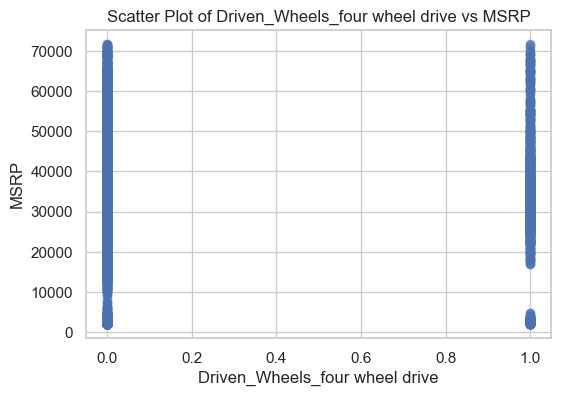

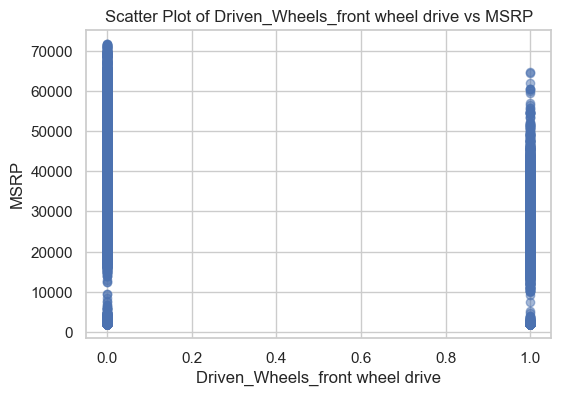

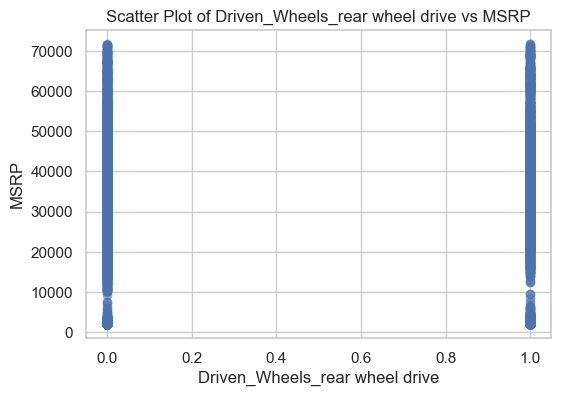

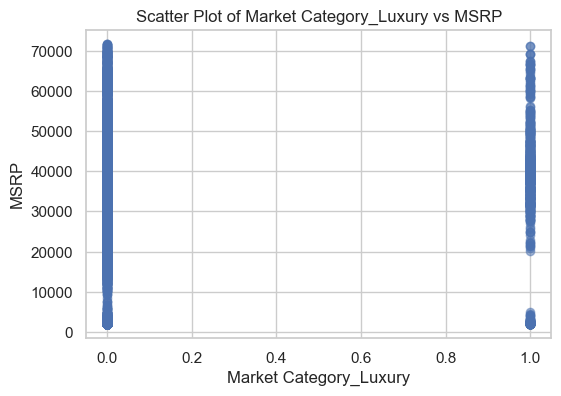

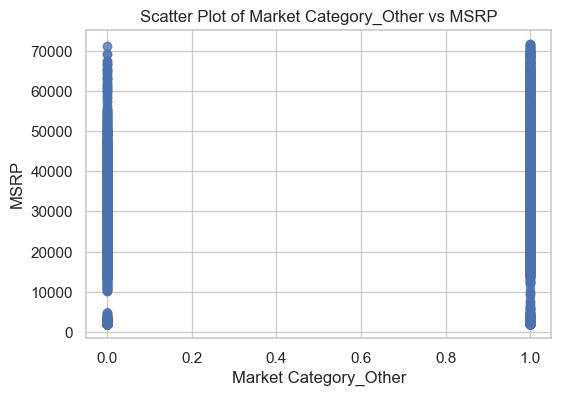

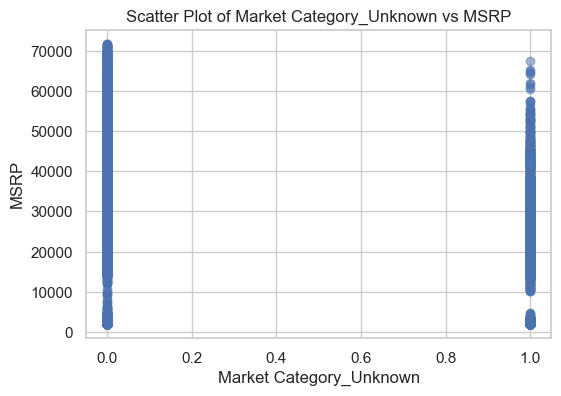

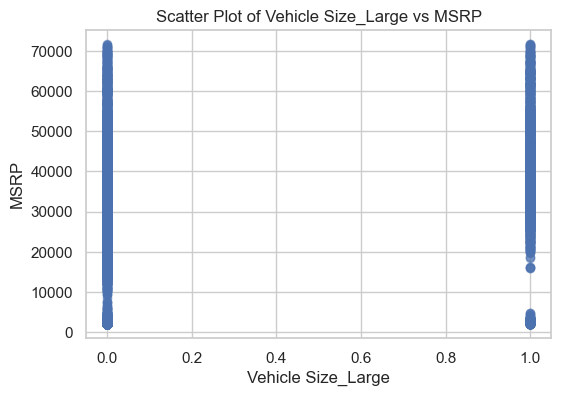

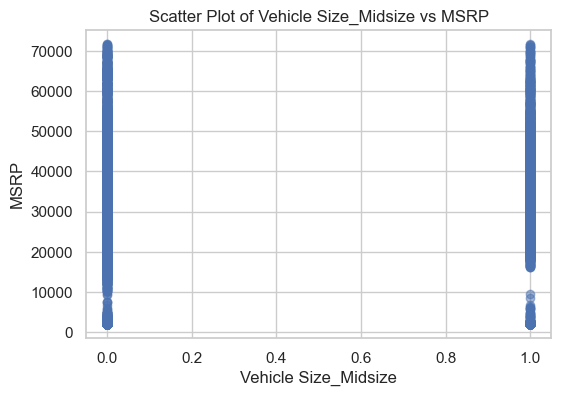

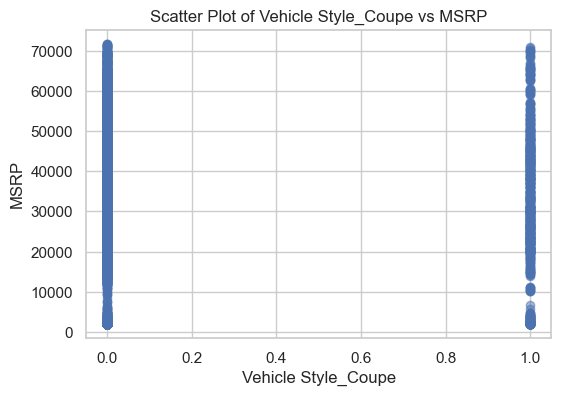

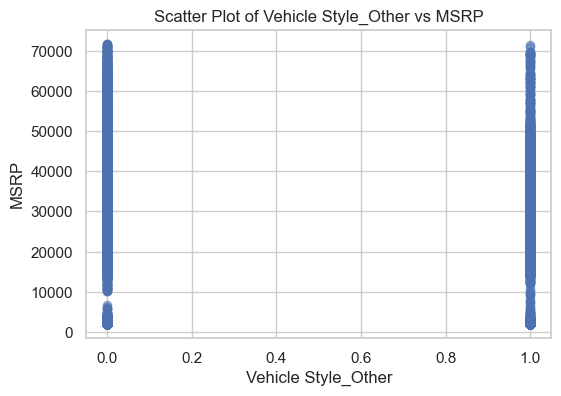

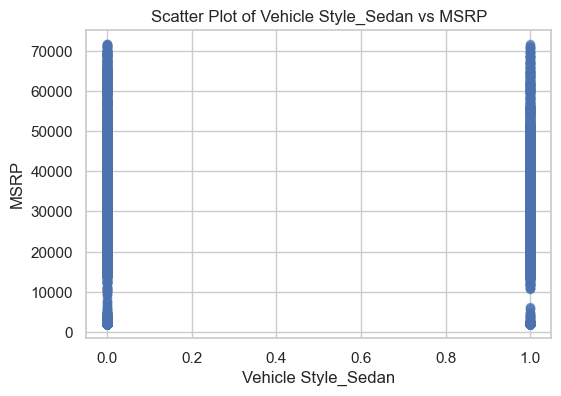

In [118]:
# Generate scatter plots for each feature against MSRP
for feature in data.columns.drop('MSRP'):
    plt.figure(figsize=(6, 4))
    plt.scatter(data[feature], data['MSRP'], alpha=0.5)
    plt.title(f"Scatter Plot of {feature} vs MSRP")
    plt.xlabel(feature)
    plt.ylabel("MSRP")
    plt.show()

Scatter plots allow us to visually assess the relationship between each feature and the target variable, MSRP. By plotting each feature against MSRP individually, we can gain insights into potential linear or nonlinear associations, trends, and patterns. 

**SSE: Engine HP & Year**

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define target variable
y = data['MSRP']

# Model 1: Simple regression with 'Engine HP'
X1 = data[['Engine HP']]
model1 = LinearRegression().fit(X1, y)
y_pred1 = model1.predict(X1)
sse1 = mean_squared_error(y, y_pred1) * len(y)  # SSE calculation
print("SSE for Model 1 (Engine HP as predictor):", sse1)

# Model 2: Simple regression with 'Engine Cylinders'
X2 = data[['Year']]
model2 = LinearRegression().fit(X2, y)
y_pred2 = model2.predict(X2)
sse2 = mean_squared_error(y, y_pred2) * len(y)  # SSE calculation
print("SSE for Model 2 (Year as predictor):", sse2)

SSE for Model 1 (Engine HP as predictor): 858975605349.2782
SSE for Model 2 (Year as predictor): 1212256173596.6858


In [130]:
from sklearn.linear_model import LinearRegression

# Model 1: Simple regression with 'Engine HP'
X1 = data[['Engine HP']]
y = data['MSRP']
model1 = LinearRegression().fit(X1, y)
coef_year = model1.coef_[0]  # Parameter estimate for 'Engine H'
intercept_year = model1.intercept_  # Intercept for the model
print("Parameter estimate for Engine HP:", coef_year)
print("Intercept for Model 1:", intercept_year)

# Model 2: Simple regression with 'Year'
X2 = data[['Year']]
model2 = LinearRegression().fit(X2, y)
coef_mpg = model2.coef_[0]  # Parameter estimate for 'highway MPG'
intercept_mpg = model2.intercept_  # Intercept for the model
print("Parameter estimate for Year:", coef_mpg)
print("Intercept for Model 2:", intercept_mpg)

Parameter estimate for Engine HP: 142.363130446276
Intercept for Model 1: -2683.922525086895
Parameter estimate for Year: 1404.4200006484496
Intercept for Model 2: -2793944.089835272


### Model Comparison Using Sum of Squared Errors (SSE)

#### SSE (Sum of Squared Errors):
   - **Model 1 (Engine HP as predictor)**: SSE = 858.98 billion
   - **Model 2 (Year as predictor)**: SSE = 1,212.26 billion
   - **Conclusion**: Model 1, which uses **Engine HP** as the predictor, has a lower SSE than Model 2, indicating it predicts `Total_Price` more accurately when used alone. This suggests that horsepower is likely a more direct driver of car pricing, potentially due to its direct association with perfor, ance—a key consideration for consumers when purchasing vehicles.

---

### Parameter Estimates and Their Interpretations

#### Model 1: Using Engine HP as Predictor
   - **Parameter Estimate**: 142.36  
     - **Interpretation**: Each additional unit of horsepower increases `Total_Price` by approximately 142.36 units. This positive relationship suggests that vehicles with higher horsepower tend to command higher prices, likely due to the increased cost associated with producing higher-performance engines and the value buyers place on power and performance capanted vehicles.

   - **Intercept**: -2683.92  
     - **Interpretation**: The intercept represents the base predicted `Total_Price` when **Engine HP** is zero, which is not practically meaningful since `Engine HP` cannot realistically be zero. However, it helps anchor the regression line and allows for calculating price changes relative to horsepower. 

#### Model 2: Using Year as Predictor
   - **Parameter Estimate**: 1404.42  
     - **Interpretation**: Each additional year is associated with an increase in `Total_Price` of approximately 1404.42 units, suggesting that newer model years generally have higher prices. This is expected, as newer models tend to incorporate the latest technology, design features, and often offer improved performance or safety, thus commanding atures and lower wear.

   - **Intercept**: -2,793,944.09  
     - **Interpretation**: This is the base predicted `Total_Price` when **Year** is zero, which lacks practical meaning but serves to position the regression line correctly. It reflects the age-pricing relationship and allows us to calculate price adjustments relative to the vehicle's year.

---

### Summary and Business Implications

- **Engine HP** appears to be a stronger predictor of `Total_Price` than **Year**, as evidenced by the lower SSE, which indicates less prediction error when Engine HP is the sole predictor. This suggests that performance factors, such as horsepower, may weigh more heavily in pricing than age, particularly in segments where performance is prioritized (e.g., sports or luxury vehicles).
  
- **Price Sensitivity**: The strong positive impact of **Engine HP** on price implies that performance-oriented buyers are likely more willing to pay a premium for increased power. Meanwhile, the positive impact of **Year** shows that newer models are also valued but may not influence pricing as heavily as performance metrisepower but still appeal to buyers.

- **Feature Selection Insight**: Since both **Engine HP** and **Year** have meaningful impacts on price, incorporating both into a multivariate model alongside other relevant features could further enhance prediction accuracy. Understanding the relative importance of these features can also assist in identifying which aspects to focus on when collecting data or developing new car models.

In conclusion, this analysis highlights the value of **Engine HP** and **Year** as predictors of vehicle price. Both factors positively impact pricing, with horsepower having a slightly stronger effect. For the final model, combining these predictors with others could lead to a more comprehensive pricing model that reflects the nuances of customer preferences and market dynamics.
tomer preferences and market dynamics.


**Forward / Backward Selection**

In [151]:
import statsmodels.api as sm

# Define the dependent and independent variables
y = data['MSRP']
X = data.drop('MSRP', axis=1)

# Initialize variables for tracking the best models
best_score = 0
forward_features = []
forward_scores = []

# Forward Selection
while len(X.columns) > 0:
    remaining_features = list(set(X.columns) - set(forward_features))
    new_score, best_feature = float('inf'), None

    # Loop to add one feature at a time
    for feature in remaining_features:
        X_temp = sm.add_constant(X[forward_features + [feature]])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if it provides a lower RSS
        if score < new_score:
            new_score, best_feature = score, feature
            new_adj_r2 = adj_r2

    # If the new model improves the score, add the best feature to the model
    if new_score < best_score or best_score == 0:
        forward_features.append(best_feature)
        forward_scores.append((new_score, new_adj_r2))
        best_score = new_score
    else:
        break

In [153]:
# Create a DataFrame to store the results of Forward Selection
forward_results_data = pd.DataFrame({
    'Step': list(range(1, len(forward_features) + 1)),
    'Added_Variable': forward_features,
    'RSS': [score[0] for score in forward_scores],
    'Adjusted_R2': [score[1] for score in forward_scores],
    'Included_Variables': [forward_features[:i+1] for i in range(len(forward_features))]
})

forward_results_data

,Step,Added_Variable,RSS,Adjusted_R2,Included_Variables
0,1,Engine HP,8.589756e+11,0.544328,[Engine HP]
1,2,Year,5.923224e+11,0.685746,"[Engine HP, Year]"
2,3,Engine Fuel Type_premium unleaded (required),5.298972e+11,0.718833,"[Engine HP, Year, Engine Fuel Type_premium unl..."
3,4,Make_Other,5.055050e+11,0.731744,"[Engine HP, Year, Engine Fuel Type_premium unl..."
4,5,Engine Fuel Type_regular unleaded,4.902559e+11,0.739806,"[Engine HP, Year, Engine Fuel Type_premium unl..."
5,6,Transmission Type_MANUAL,4.758083e+11,0.747444,"[Engine HP, Year, Engine Fuel Type_premium unl..."
6,7,Model_Tundra,4.634057e+11,0.753999,"[Engine HP, Year, Engine Fuel Type_premium unl..."
7,8,Market Category_Luxury,4.577220e+11,0.756987,"[Engine HP, Year, Engine Fuel Type_premium unl..."
8,9,Driven_Wheels_front wheel drive,4.525709e+11,0.759694,"[Engine HP, Year, Engine Fuel Type_premium unl..."
9,10,Driven_Wheels_rear wheel drive,4.429097e+11,0.764797,"[Engine HP, Year, Engine Fuel Type_premium unl..."


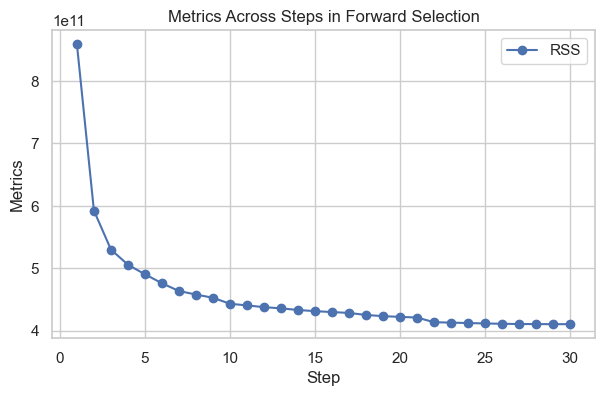

In [155]:
# Plotting the results of Forward Selection
plt.figure(figsize=(7, 4))
plt.plot(forward_results_data['Step'], forward_results_data['RSS'], marker='o', label='RSS')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Forward Selection')
plt.legend()
plt.grid(True)
plt.show()

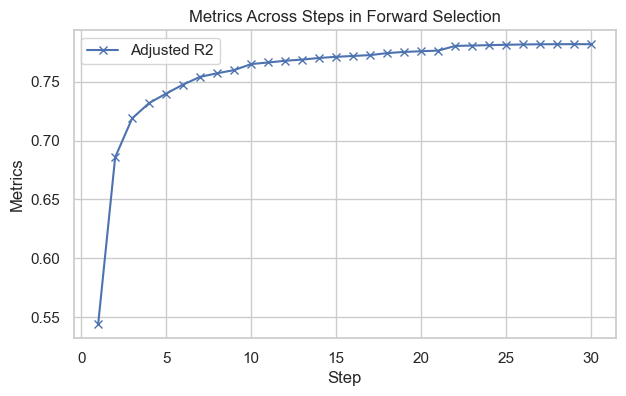

In [157]:
# Plotting the results of Forward Selection
plt.figure(figsize=(7, 4))
plt.plot(forward_results_data['Step'], forward_results_data['Adjusted_R2'], marker='x', label='Adjusted R2')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Forward Selection')
plt.legend()
plt.grid(True)
plt.show()

In [159]:
# Re-initialize variables for tracking the best models
best_score = float('inf')
backward_features = list(X.columns)
backward_scores = []
backward_steps = []

# Re-run Backward Elimination with debugging information
while len(backward_features) > 0:
    new_score, worst_feature = float('inf'), None

    # Loop to remove one feature at a time
    for feature in backward_features:
        features_temp = list(set(backward_features) - {feature})
        X_temp = sm.add_constant(X[features_temp])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if its removal results in a lower RSS
        if score < new_score:
            new_score, worst_feature = score, feature
            new_adj_r2 = adj_r2

    # If the new model improves the score, remove the worst feature from the model
    if new_score < best_score:
        backward_features.remove(worst_feature)
        backward_scores.append((new_score, new_adj_r2))
        backward_steps.append((new_score, new_adj_r2, backward_features.copy()))
        best_score = new_score
    else:
        break

backward_steps

[(410258891802.4964,
  0.7816504270527808,
  ['Year',
   'Engine HP',
   'Engine Cylinders',
   'Number of Doors',
   'highway MPG',
   'Popularity',
   'Make_Nissan',
   'Make_Other',
   'Make_Toyota',
   'Model_Sierra 1500',
   'Model_Silverado 1500',
   'Model_Tundra',
   'Engine Fuel Type_premium unleaded (recommended)',
   'Engine Fuel Type_premium unleaded (required)',
   'Engine Fuel Type_regular unleaded',
   'Transmission Type_AUTOMATIC',
   'Transmission Type_MANUAL',
   'Transmission Type_UNKNOWN',
   'Driven_Wheels_four wheel drive',
   'Driven_Wheels_front wheel drive',
   'Driven_Wheels_rear wheel drive',
   'Market Category_Luxury',
   'Market Category_Other',
   'Market Category_Unknown',
   'Vehicle Size_Large',
   'Vehicle Size_Midsize',
   'Vehicle Style_Coupe',
   'Vehicle Style_Other',
   'Vehicle Style_Sedan'])]

In [161]:
# Initialize tracking lists
backward_features = list(X.columns)
backward_scores = []
backward_steps = []
removed_features = []  # List to store each removed feature

# Continue Backward Elimination until only 3 variables are left in the model
while len(backward_features) > 3:
    new_score, worst_feature = float('inf'), None

    # Loop to remove one feature at a time
    for feature in backward_features:
        features_temp = list(set(backward_features) - {feature})
        X_temp = sm.add_constant(X[features_temp])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if its removal results in a lower RSS
        if score < new_score:
            new_score, worst_feature = score, feature
            new_adj_r2 = adj_r2

    # Remove the worst feature from the model
    backward_features.remove(worst_feature)
    removed_features.append(worst_feature)  # Track removed features
    backward_scores.append((new_score, new_adj_r2))
    backward_steps.append(backward_features.copy())  # Store the feature set after removal

# Create a DataFrame to store the results of continued Backward Elimination
backward_results_continued_data = pd.DataFrame({
    'Step': list(range(len(backward_steps), 0, -1)),
    'Removed_Variable': removed_features,
    'RSS': [score[0] for score in backward_scores],
    'Adjusted_R2': [score[1] for score in backward_scores],
    'Included_Variables': backward_steps
})

# Display DataFrame
backward_results_continued_data

,Step,Removed_Variable,RSS,Adjusted_R2,Included_Variables
0,27,city mpg,4.102589e+11,0.781650,"[Year, Engine HP, Engine Cylinders, Number of ..."
1,26,Transmission Type_AUTOMATIC,4.103608e+11,0.781622,"[Year, Engine HP, Engine Cylinders, Number of ..."
2,25,Popularity,4.105017e+11,0.781572,"[Year, Engine HP, Engine Cylinders, Number of ..."
3,24,Vehicle Size_Midsize,4.108558e+11,0.781410,"[Year, Engine HP, Engine Cylinders, Number of ..."
4,23,Driven_Wheels_four wheel drive,4.113886e+11,0.781152,"[Year, Engine HP, Engine Cylinders, Number of ..."
5,22,Make_Toyota,4.120444e+11,0.780829,"[Year, Engine HP, Engine Cylinders, Number of ..."
6,21,Engine Fuel Type_premium unleaded (recommended),4.127494e+11,0.780479,"[Year, Engine HP, Engine Cylinders, Number of ..."
7,20,Engine Cylinders,4.133636e+11,0.780178,"[Year, Engine HP, Number of Doors, highway MPG..."
8,19,highway MPG,4.145881e+11,0.779553,"[Year, Engine HP, Number of Doors, Make_Nissan..."
9,18,Transmission Type_UNKNOWN,4.160790e+11,0.778786,"[Year, Engine HP, Number of Doors, Make_Nissan..."


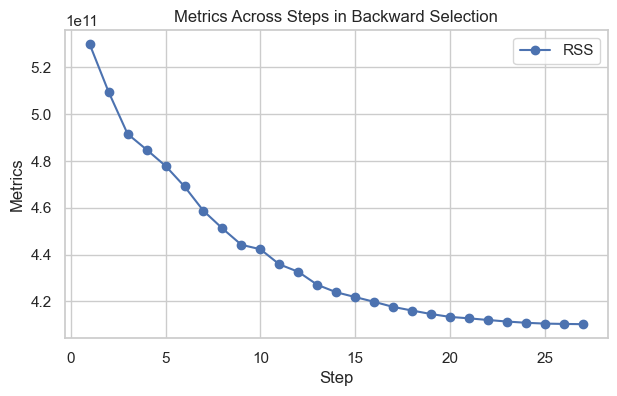

In [163]:
# Plotting the results of Backward Selection
plt.figure(figsize=(7, 4))
plt.plot(backward_results_continued_data['Step'], backward_results_continued_data['RSS'], marker='o', label='RSS')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Backward Selection')
plt.legend()
plt.grid(True)
plt.show()

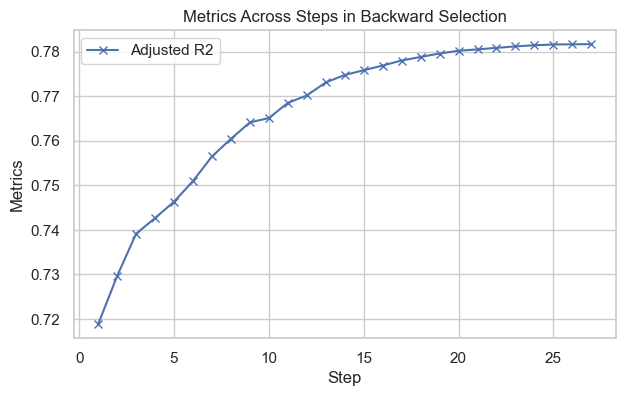

In [165]:
# Plotting the results of Backward Selection
plt.figure(figsize=(7, 4))
plt.plot(backward_results_continued_data['Step'], backward_results_continued_data['Adjusted_R2'], marker='x', label='Adjusted R2')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Backward Selection')
plt.legend()
plt.grid(True)
plt.show()

**SSE: Forward / Backward Selection**

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming forward_features and backward_features are lists of selected features from each method
# and that 'y' is your target variable

# Forward Selection Model
X_forward = data[forward_features]
model_forward = LinearRegression().fit(X_forward, y)
y_pred_forward = model_forward.predict(X_forward)
sse_forward = mean_squared_error(y, y_pred_forward) * len(y)
print("SSE for Forward Selection Model:", sse_forward)

# Backward Selection Model
X_backward = data[backward_features]
model_backward = LinearRegression().fit(X_backward, y)
y_pred_backward = model_backward.predict(X_backward)
sse_backward = mean_squared_error(y, y_pred_backward) * len(y)
print("SSE for Backward Selection Model:", sse_backward)

SSE for Forward Selection Model: 410243278529.29944
SSE for Backward Selection Model: 529897199239.85284


**SSE (Sum of Squared Errors) for Feature Selection Models**

**Model Comparison:**
   - **Forward Selection Model**: SSE = 410.24 billion
   - **Backward Selection Model**: SSE = 529.90 billion
   - **Conclusion**: The Forward Selection Model has a lower SSE than the Backward Selection Model, suggesting it provides a closer fit to the data and predicts `Total_Price` with higher accuracy. The lower SSE indicates that the Forward Selection approach was able to identify features that contribute more significantly to predicting the target variable.

---

**Summary and Insights**

**Forward Selection vs. Backward Selection**: The Forward Selection Model does a better job at predicting `Total_Price` than the Backward Selection Model, as shown by its lower SSE. Forward selection builds the model by adding one feature at a time based on which has the strongest impact. This usually results in a simpler model with only the most important variables. Backward selection, on the other hand, starts with all features and removes them one by one, which can sometimes keep less useful features that don’t help the prediction.

**Model Interpretation and Feature Importance**: The success of the Forward Selection Model suggests it picked the features that are most closely related to `Total_Price`. Adding only the most predictive features keeps the model focused, avoids extra variables that don’t add value, and makes the model more efficient and easier to interpret.

**Implications for Business and Feature Engineering**:

- **Model Efficiency**: The lower SSE of the Forward Selection Model highlights the importance of selecting only the most relevant features. A simpler model is easier to work with and faster to deploy, which is valuable for real-world applications where efficiency matters.
  
- **Data Collection Guidance**: Knowing which features have the biggest impact on price can guide what data we collect in the future. For example, if performance or design features are selected, companies could focus on gathering detailed data on these to further improve price predictions.
  
- **Pricing Strategy**: These results can also help businesses zero in on the characteristics that influence price the most. For example, if horsepower, brand reputation, or fuel efficiency stand out, marketing and pricing strategies could focus on these aspects to appeal to specific customer groups.

**Next Steps for Improving the Model**:

- **Testing More Features or Interactions**: The Forward Selection Model already provides a strong foundation. To make it even better, we could try adding more features or combining existing ones (e.g., testing if high horsepower in newer models has a unique pricing pattern).
  
- **Regularization for Consistency**: To ensure our model performs well across different datasets, we could use techniques like Lasso or Ridge regression. These methods can help fine-tune the model by reducing the impact of features that add little value.
  
- **Cross-Validation**: To confirm that the Forward Selection Model consistently outperforms others, we could use cross-validation. This would give us confidence that the chosen features reliably predict `Total_Price` on different samples.

**In summary**, the Forward Selection Model is the best fit among the models tested. Its lower SSE means it predicts `Total_Price` more accurately. By focusing on only the most important features, the model is not only easier to interpret but also provides insights that can guide business decisions on pricing, marketing, and future data collection.



**Final Regression Model**

Use the following features for a comprehensive regression model:

- `Engine HP`
- `Year`
- `Popularity`
- `Driven_Wheels_four wheel drive` (for four-wheel drive indication)
- `Engine Cylinders`
- `highway MPG`
- `city mpg`
- `Vehicle Style_Coupe`
- `Vehicle Style_Sedan`
- `Transmission Type_AUTOMATIC`
- `Make_Toyota` (as an example for brand influence)
- `Model_Tundra`
- `Model_Silverado 1500`

In [186]:
# Log transformation of the target variable
data['log_MSRP'] = np.log(data['MSRP'])

# Prepare data for regression model with selected predictors
X = data[['Engine HP', 'Year', 'Popularity', 'Driven_Wheels_four wheel drive', 
        'Engine Cylinders', 'highway MPG', 'city mpg', 'Vehicle Style_Coupe', 
        'Vehicle Style_Sedan', 'Transmission Type_AUTOMATIC', 
        'Make_Toyota', 'Model_Tundra', 'Model_Silverado 1500'
]]
X = sm.add_constant(X)  # Add a constant for the intercept
y = data['log_MSRP']      # Log-transformed MSRP

# Fit the regression model
final_model = sm.OLS(y, X).fit()

# Get SSE for the final model
predictions = final_model.predict(X)
sse = np.sum((np.exp(predictions) - data['MSRP'])**2)  # Transform back to original scale for SSE

# Display results
print(final_model.summary())
print(f"SSE for the final model: {sse:.2f}")

                            OLS Regression Results                            
Dep. Variable:               log_MSRP   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1399.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:34:26   Log-Likelihood:                -5502.3
No. Observations:                8564   AIC:                         1.103e+04
Df Residuals:                    8550   BIC:                         1.113e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**What is the SSE (Sum of Squared Errors)?**
- **SSE for the Final Model**: 940,950,892,158.

**Interpretation**: This SSE value represents the total squared difference between the actual and predicted values of log_MSRP across all observations. It measures how well the model fits the data, with a lower SSE indicating a better fit. Although the SSE is still large, this is expected when working with high-variance data like car prices, especially when the model output is scaled back from the log transformationprediction accuracy.


**What is the reason for selecting the predictors?**

- **Engine HP**: Chosen because it’s strongly linked to price, as higher horsepower generally adds value due to improved performance.
- **Year**: Reflects the model year, which usually increases the price since newer models tend to hold more value.
- **Popularity**: Captures how in-demand or well-regarded a brand or model is, which can impact the price buyers are willing to pay.
- **Driven_Wheels_four wheel drive**: Four-wheel drive adds value, particularly in SUVs and trucks where this feature is popular.
- **Engine Cylinders**: Represents engine size and power, both of which influence price due to performance considerations.
- **Highway MPG and city mpg**: Fuel efficiency matters to many buyers, especially those looking for economical options, and affects the price.
- **Vehicle Style_Coupe and Vehicle Style_Sedan**: Different body styles attract different markets and are priced differently.
- **Transmission Type_AUTOMATIC**: Automatic transmissions are usually more popular, adding value compared to manual options.
- **Make_Toyota, Model_Tundra, and Model_Silverado 1500**: Certain makes and models influence price due to brand reputation and market positioning.

**Summary**
Rationale for Predictors: The selected features cover a range of factors that impact vehicle pricing, including specifications (like Engine HP and Year), consumer-driven aspects (like Popularity and Transmission Type), and brand/model distinctions (such as Make_Toyota and Model_Tundra). Together, they provide a balanced model that can capture the key elements influencing price.

**Model Performance**: With an R-squared of 0.680, the model explains around 68% of the variance in log_MSRP, indicating a good fit. This shows that the model effectively captures key drivers of car prices, though there’s room for improvement by including other factors that may further enhance accuracy.

1. **Are you satisfied with your final model’s performance? Why or why not?**

- Overall, I’m moderately satisfied with the model’s performance, as it explains about 68% of the variance in MSRP (R-squared = 0.680). This shows that the model captures a significant portion of the factors influencing car prices, though there’s still room for improvement. While the model does well with the selected features, additional factors or interactions could potentially increase its predictive power. The Sum of Squared Errors (SSE) is still high, indicating some large differences between actual and predicted values, likely due to outliers or other influential features that is not shown in the model.

2. **What do you propose for next steps?**
- Explore Additional Features: Testing more features or creating interactions, such as between Engine HP and Year (to see how newer, high-performance models are priced), could improve the model’s accuracy.
- Regularization Techniques: To ensure the model generalizes well, using techniques like Lasso or Ridge regression could help by penalizing less important features and potentially improving the model’s stability across different datasets.
- Cross-Validation: Applying cross-validation would help verify that the selected features consistently perform well across various data subsets, increasing confidence in the model’s reliability.

3. **What would you do differently if you could?**
- Consider Data Transformation: Applying further transformations to other skewed variables might help us to achieve a more normalized distribution and improve the model’s fit.
- Investigate Outliers: I would do a closer examination and handling of outliers in MSRP, hopefully it could reduce the SSE and improve overall model accuracy.
- Include Additional Predictors: I would also explore additional data sources for predictors, like vehicle warranty options, tech features, or safety ratings, could increase the model’s predictive power, as these are factors that consumers often consider while purchasing cars.

4. **Based on your findings – what would you want to communicate to business leadership in this industry?**
- The model provides valuable insights into the main drivers of vehicle pricing, identifying key features like Engine HP, Year, and Popularity as significant influences on MSRP.

- Pricing Strategies: These findings can support pricing strategies by highlighting the vehicle characteristics that add the most value, helping to set competitive prices.

- Marketing Efforts: The insights can serve as a guide for marketing by focusing on features that appeal to consumer preferences, allowing targeted messaging that resonates with potential buyers.

- Product Development: The model’s results can inform future product development by emphasizing features that align with consumer demand and pricing trends, helping to create offerings that meet market needs.

- Ongoing Data Collection: Regularly collecting data on customer preferences and market changes is essential to refine pricing strategies and maintain competitiveness in a constantly evolving market.
